In [1]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
from PIL import Image

In [2]:
# Download the dataset from the below link
# https://www.kaggle.com/datasets/puneet6060/intel-image-classification

with ZipFile(r'intel image classification\archive (6).zip') as zf:
    zf.extractall(r'Datasets\Img\intel_image_classification')

In [3]:
img=Image.open(r'Datasets\Img\intel_image_classification\seg_train\seg_train\street\74.jpg')
img.size

(150, 150)

In [4]:
data=tf.keras.utils.image_dataset_from_directory(r'Datasets\Img\intel_image_classification\seg_train\seg_train',color_mode='rgb',image_size=(64,64),batch_size=14034)

Found 14034 files belonging to 6 classes.


In [5]:
model=tf.keras.Sequential([
    layers.Conv2D(18,3,input_shape=(64,64,3),activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(48,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(28,'leaky_relu'),
    layers.Dense(15,'relu'),
    layers.Dense(6,'softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 18)        504       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 18)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 36)        5868      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 36)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 48)        15600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 48)         0

In [7]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,6)
    record=model.fit(features,labels,batch_size=140,epochs=100)

Epoch 1/100
101/101 [==============================] - 40s 341ms/step - loss: 1.3237 - accuracy: 0.4562
Epoch 2/100
101/101 [==============================] - 28s 281ms/step - loss: 1.0464 - accuracy: 0.5854
Epoch 3/100
101/101 [==============================] - 25s 251ms/step - loss: 0.9149 - accuracy: 0.6482
Epoch 4/100
101/101 [==============================] - 26s 261ms/step - loss: 0.8467 - accuracy: 0.6752
Epoch 5/100
101/101 [==============================] - 25s 253ms/step - loss: 0.7918 - accuracy: 0.6996
Epoch 6/100
101/101 [==============================] - 25s 252ms/step - loss: 0.7604 - accuracy: 0.7160
Epoch 7/100
101/101 [==============================] - 26s 253ms/step - loss: 0.7209 - accuracy: 0.7361
Epoch 8/100
101/101 [==============================] - 29s 283ms/step - loss: 0.6819 - accuracy: 0.7489
Epoch 9/100
101/101 [==============================] - 28s 273ms/step - loss: 0.6686 - accuracy: 0.7585
Epoch 10/100
101/101 [==============================] - 27s 263m

In [9]:
tf.keras.models.save_model(model,r'Datasets\models\intelClassification.h5')

In [10]:
model=tf.keras.models.load_model(r'Datasets\models\intelClassification.h5')

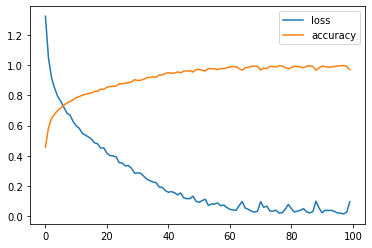

In [11]:
plt.plot(record.history['loss'],label='loss')
plt.plot(record.history['accuracy'],label='accuracy')
plt.legend()
plt.show()